In [1]:
import re
import community
import networkx as nx
import pandas as pd
import community
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation


import re
import jieba

from igraph import * 

In [2]:
# 先读xlsx文件，并转成dataframe

df = pd.read_excel('./BiliBiliComments.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52280 entries, 0 to 52279
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  52280 non-null  int64         
 1   root        52280 non-null  int64         
 2   uid         52280 non-null  int64         
 3   uname       52171 non-null  object        
 4   usex        52280 non-null  object        
 5   ulevel      52280 non-null  int64         
 6   rpid        52280 non-null  int64         
 7   like        52280 non-null  int64         
 8   time        52280 non-null  datetime64[ns]
 9   content     52279 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 4.0+ MB


In [3]:
# encoding=utf-8
# import pyLDAvis.gensim_models
# import jieba.posseg as jp,jieba
# from gensim.models.coherencemodel import CoherenceModel
# from gensim.models.ldamodel import LdaModel
# from gensim.corpora.dictionary import Dictionary

# # 读取需要处理的文本
# # doc1=open('./data/text1.txt','rb').read()
# # doc2=open('./data/text2.txt','rb').read()

# # 构建文本集
# # texts = [doc1,doc2] # 这个文档集是不是直接就是content列的每一行数据，所以相当于把dataframe的列转成列表即可

# #面对报错'int' object has no attribute 'decode'，查到的解决方式是直接强制转换成str类型
# df['content'] = df['content'].astype(str)

# # 数据清洗版content列
# # 删除前面的“回复 @ :”
# df['content'].replace(regex=True,inplace=True,to_replace=r'\回.*\:',value=r'')
# # 要不要删除表情符号？
# df['content'].replace(regex=True,inplace=True,to_replace=r'\[.*\]',value=r'')


# # 先把所有评论搞在一起？
# contentlist = df['content'].tolist()
# contentlist


# # 词性标注条件
# flags = ('n', 'nr', 'ns', 'nt', 'eng', 'v', 'd','vn','vd')
# # 停用词表
# stopwords = open("./stopwords2.txt","r",encoding='utf-8').read()
# # 分词
# words_ls = []
# for contenttext in contentlist:
#     # 采用jieba进行分词
#     words = [word.word for word in jp.cut(contenttext) if word.flag in flags and word.word not in stopwords]
#     words_ls.append(words)


# # 构造词典
# dictionary = Dictionary(words_ls)
# # 基于词典，使【词】→【稀疏向量】，并将向量放入列表，形成【稀疏向量集】
# corpus = [dictionary.doc2bow(words) for words in words_ls]


# # lda模型，num_topics设置主题的个数
# lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100, iterations=50)
# # U_Mass Coherence
# ldaCM = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass')

# # 打印所有主题，每个主题显示10个词
# for topic in lda.print_topics(num_words=10):
#     print(topic)

# # 用pyLDAvis将LDA模式可视化
# plot =pyLDAvis.gensim_models.prepare(lda,corpus,dictionary)
# # 保存到本地html
# pyLDAvis.save_html(plot, './pyLDAvis.html')


In [3]:
import re
import jieba


#面对报错'int' object has no attribute 'decode'，查到的解决方式是直接强制转换成str类型
df['content'] = df['content'].astype(str)


# 数据清洗版content列
# 删除前面的“回复 @ :”
df['content'].replace(regex=True,inplace=True,to_replace=r'\回.*\:',value=r'')
# 要不要删除表情符号？
df['content'].replace(regex=True,inplace=True,to_replace=r'\[.*\]',value=r'')

df.head(10)


,Unnamed: 0,root,uid,uname,usex,ulevel,rpid,like,time,content
0,0,0,3907,奔跑呀,保密,6,4720941640,4550,2021-06-13 17:36:28,全靠自来水给你们流量，那给你们的宣传经费都弄哪了？都花在制作上了啊，哦，那没事了。
1,1,4720941640,29041209,朝朝暮暮长,女,5,4722257822,220,2021-06-13 21:17:50,大概是保密局宣传的吧
2,2,4720941640,11969756,Tiger123456,保密,6,4722793998,16,2021-06-13 22:42:34,卧槽，你要笑死我
3,3,4720941640,392092219,花四怂不怂,保密,5,4726184812,2,2021-06-14 14:15:42,宣发不给力啊
4,4,4720941640,237243184,追星星的鱼yu,女,5,4728204580,75,2021-06-14 20:17:02,老艺术家是白嫖的，青年演员是兼职的，连热度都是观众贡献的（不愧是我河能省）
5,5,4720941640,262510697,姝诺,保密,5,4728204671,10,2021-06-14 20:17:05,俺们大卫说俺们没钱
6,6,4720941640,31866046,我的被被呢,女,6,4728296102,10,2021-06-14 20:31:31,自从首页刷到《祈》之后，瞬间首页推荐都是端午奇了
7,7,4720941640,501700348,肚饿真君Gold,保密,3,4729181195,1,2021-06-14 22:51:33,没钱才能有好作品？
8,8,4720941640,5244342,y阳洋,保密,6,4729208339,30,2021-06-14 22:56:29,快给个门路，让我们给你们众筹！！！各种热搜霸屏搞起来！！不然生气了！！
9,9,4720941640,607075,我是散兵大人唯一的狗,女,6,4729954243,186,2021-06-15 01:22:10,绝对是保密局。我今天才被人安利2006年河南的晚会。超震撼。\n终于知道河南不缺资金的时候能...


In [4]:

def chinese_word_cut(mytext):
    jieba.load_userdict('dic_newword.txt')  # 这里你可以添加jieba库识别不了的网络新词，避免将一些新词拆开
    jieba.initialize()
    # 文本预处理 ：去除一些无用的字符只提取出中文出来
    new_data = re.findall('[\u4e00-\u9fa5]+', mytext, re.S)
    new_data = " ".join(new_data)

    # 文本分词
    seg_list_exact = jieba.cut(new_data) #使用精确分词模式
    result_list = []
    with open('stopwords_lda.txt', encoding='utf-8') as f: # 可根据需要打开停用词库，然后加上不想显示的词语
        con = f.readlines()
        stop_words = set()
        for i in con:
            i = i.replace("\n", "")   # 去掉读取每一行数据的\n
            stop_words.add(i)

    for word in seg_list_exact:
        if word not in stop_words and len(word) > 1:
            result_list.append(word)      
    return " ".join(result_list)

#     # 词性标注条件
#     flags = ('n', 'nr', 'ns', 'nt', 'eng', 'v', 'd','vn','vd')
#     # 停用词表
#     stopwords = open("./stopwords_lda.txt","r",encoding='utf-8').read()
#     # 分词
#     words_ls = []
#     for contenttext in contenlist:
#         # 采用jieba进行分词
#         words = [word.word for word in jieba.cut(contenttext) if word.flag in flags and word.word not in stopwords]
#         words_ls.append(words)
#     return " ".join(words_ls)  
        


In [5]:
df["content_cutted"] = df.content.apply(chinese_word_cut)
df.head(8)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ll/xx5jng3s4fs5dqmstx6z2_hw0000gn/T/jieba.cache
Loading model cost 0.310 seconds.
Prefix dict has been built successfully.


,Unnamed: 0,root,uid,uname,usex,ulevel,rpid,like,time,content,content_cutted
0,0,0,3907,奔跑呀,保密,6,4720941640,4550,2021-06-13 17:36:28,全靠自来水给你们流量，那给你们的宣传经费都弄哪了？都花在制作上了啊，哦，那没事了。,全靠 自来水 流量 宣传 经费 制作 没事
1,1,4720941640,29041209,朝朝暮暮长,女,5,4722257822,220,2021-06-13 21:17:50,大概是保密局宣传的吧,保密局 宣传
2,2,4720941640,11969756,Tiger123456,保密,6,4722793998,16,2021-06-13 22:42:34,卧槽，你要笑死我,卧槽 笑死
3,3,4720941640,392092219,花四怂不怂,保密,5,4726184812,2,2021-06-14 14:15:42,宣发不给力啊,宣发 不给力
4,4,4720941640,237243184,追星星的鱼yu,女,5,4728204580,75,2021-06-14 20:17:02,老艺术家是白嫖的，青年演员是兼职的，连热度都是观众贡献的（不愧是我河能省）,艺术家 青年 演员 兼职 热度 观众 贡献 不愧 河能
5,5,4720941640,262510697,姝诺,保密,5,4728204671,10,2021-06-14 20:17:05,俺们大卫说俺们没钱,大卫
6,6,4720941640,31866046,我的被被呢,女,6,4728296102,10,2021-06-14 20:31:31,自从首页刷到《祈》之后，瞬间首页推荐都是端午奇了,首页 刷到 瞬间 首页 推荐 端午
7,7,4720941640,501700348,肚饿真君Gold,保密,3,4729181195,1,2021-06-14 22:51:33,没钱才能有好作品？,作品


In [27]:
df.to_csv('ldacutword_cutall.csv',index = False)

In [4]:
# df = pd.read_csv('./ldacutword.csv')
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52280 entries, 0 to 52279
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      52280 non-null  int64 
 1   root            52280 non-null  int64 
 2   uid             52280 non-null  int64 
 3   uname           52171 non-null  object
 4   usex            52280 non-null  object
 5   ulevel          52280 non-null  int64 
 6   rpid            52280 non-null  int64 
 7   like            52280 non-null  int64 
 8   time            52280 non-null  object
 9   content         51081 non-null  object
 10  content_cutted  47019 non-null  object
dtypes: int64(6), object(5)
memory usage: 4.4+ MB


In [6]:
# 文本向量化

from sklearn.feature_extraction.text import CountVectorizer
 
# n_features = 1000 #提取1000个特征词语
n_features = 5000 #试试5000个
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(df.content_cutted)
# tf = tf_vectorizer.fit_transform(df.content_cutted_all)

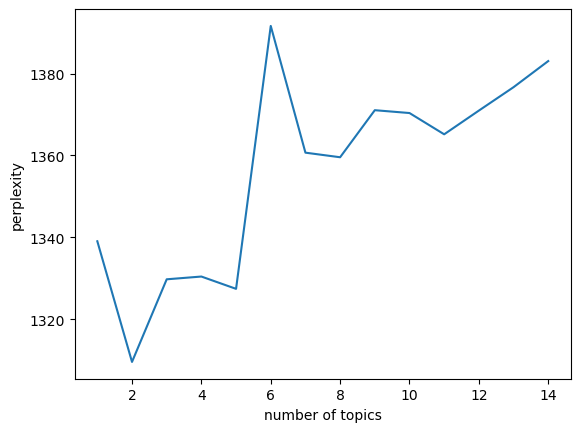

In [7]:
# 利用困惑度再未知主题个数的时候通过可视化（折线图）来确定

import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation

plexs = []
scores = []
n_max_topics = 16  # 这里值可自行设置
for i in range(1,n_max_topics):
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=666)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))
 
n_t=15 # 区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t))
plt.plot(x,plexs[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

In [10]:
# 输出一下全分词、5000向量、topic=8的困惑度
print(plexs[7])

1077.9899311075224


In [11]:
# 构建lda模型

n_topics = 7  # 可以计算困惑度得到（看看10和12的效果）
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='batch',
                                learning_offset=50,
                                doc_topic_prior=0.1,
                                topic_word_prior=0.01,
                               random_state=666)  # 关于模型的参数,可查看官方文档
lda.fit(tf)

LatentDirichletAllocation(doc_topic_prior=0.1, learning_offset=50, max_iter=50,
                          n_components=7, random_state=666,
                          topic_word_prior=0.01)

In [12]:
# 模型构建好后，输出每个主题对应的词语
def print_top_words(model, feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:" )
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        tword.append(topic_w)
        print(topic_w)
    return tword
# 输出每个主题对应词语
n_top_words = 25
tf_feature_names = tf_vectorizer.get_feature_names()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
河南 节目 春晚 端午 晚会 河南卫视 希望 奇妙游 太棒了 美好 唐宫夜宴 电视台 喜欢 央视 加油 用心 建议 观众 绝绝子 清明 宣传 丽人行 导演 晚晚 完整版
Topic #1:
文化 河南 中国 传统 日本 卧槽 飞天 中原 这才 历史 华夏 东西 哔哩 太牛 中华文化 敦煌 自信 想到 传承 艺术 韩国 文化底蕴 大象 中华 文明
Topic #2:
太美 河南卫视 喜欢 洛神 视频 流量 明星 评论 舞蹈 确实 会员 湖南卫视 为啥 洛神赋 两个 播放 湖南台 美哭 马桶 弹幕 一点 大碗 衣服 不用 宽面
Topic #3:
大河南 好美 兰陵王 震撼 加油 仙女 惊艳 鸡皮疙瘩 入阵曲 谢谢 三连 琵琶 终于 太强 汉服 日本 不愧 中国 兰陵 曲子 早朝 感动 免费 君王 枣庄
Topic #4:
卫视 洛阳 山东 西安 中医 翩若惊鸿 完整版 婉若游龙 陕西 投币 好好 大唐 广告 郑州 永远 重庆 好帅 宣传 流风 长安 回雪 四川 古都 电视剧 学学
Topic #5:
感觉 河南人 舞蹈 七夕 骄傲 太绝 不错 期待 看着 好像 皇帝 审美 剪辑 河南卫视 中秋 镜头 美的 特别 动作 超级 关注 好好看 支持 版本 原版
Topic #6:
好看 厉害 小姐姐 水下 辛苦 绝美 姐姐 跳舞 水里 演员 这是 拍摄 舞蹈 体验 漂亮 呼吸 仙女 摄影师 神仙 可爱 憋气 水中 笑死 表演 美到


/Users/my/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
# 利用训练好的模型得出每篇文章对应的主题
import numpy as np
topics=lda.transform(tf)
topics[0] # 查看第一篇文章的主题概率
topic = []
for t in topics:
    topic.append(list(t).index(np.max(t)))
df['topic']=topic
df.to_excel("data_topic4-7.xlsx",index=False)  # 将结果保存为Excel文件


In [14]:
# LDA模型可视化
import pyLDAvis
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
pic = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.save_html(pic, 'lda_pass'+str(n_topics)+'.html') # 将可视化结果打包为html文件
pyLDAvis.show(pic,local=False)

/Users/my/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/my/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/my/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/my/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [19/Feb/2023 09:08:16] "GET / HTTP/1.1" 200 -



stopping Server...


In [ ]:
# 